In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [2]:
final_year = datetime.date.today().year

In [3]:
fred_api_key = "2feb6269f18df39acfd321ae549b7de3"
fred         = Fred(api_key=fred_api_key)
series_names = {
    'Germany':  'IRLTLT01DEM156N', 
    'Greece':   'IRLTLT01GRM156N', 
    'Italy':    'IRLTLT01ITM156N', 
    'Ireland':  'IRLTLT01IEM156N',
    'Portugal': 'IRLTLT01PTM156N',
    'Spain':    'IRLTLT01ESM156N'
}

data_list = []
for series_key, series_name in series_names.items():
    data = fred.get_series(series_name, frequency='m')
    data.name = series_key
    data_list.append(data)
df = pd.concat(data_list, axis=1)

series_GIIPS = ['Greece', 'Italy', 'Ireland', 'Portugal', 'Spain']
df_diff = df[series_GIIPS].subtract(df['Germany'], axis=0)

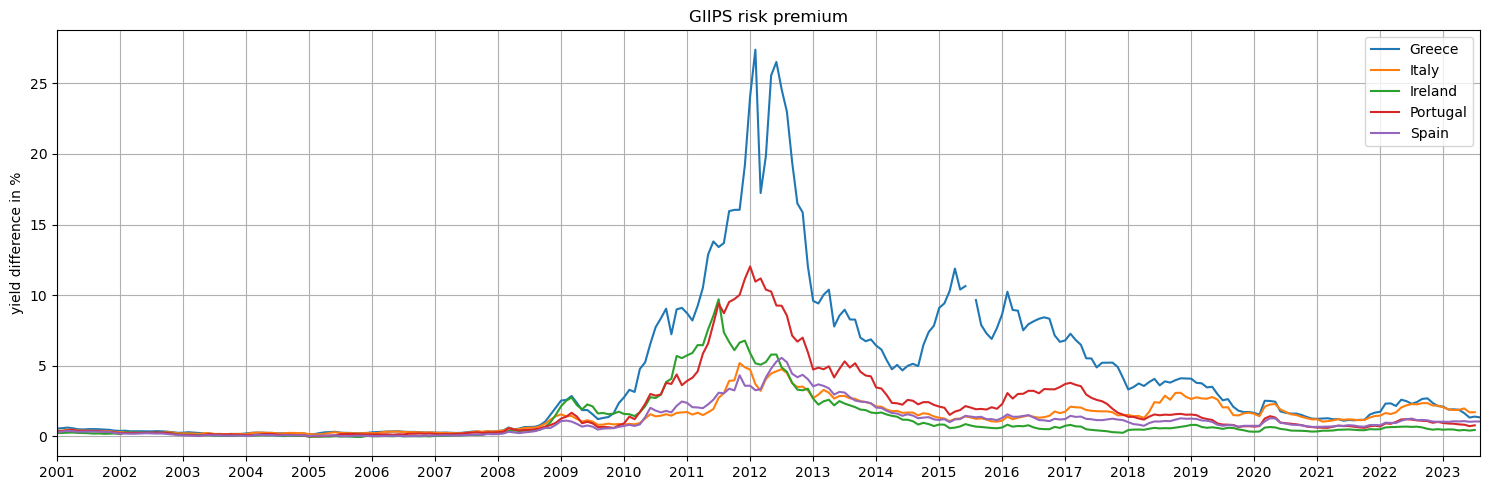

In [4]:
df_diff.loc['2001':,:].plot(figsize=(15,5), grid=True, title="GIIPS risk premium")
plt.xticks(ticks=[str(year) for year in range(2001,final_year+1)], labels=[str(year) for year in range(2001,final_year+1)])
plt.ylabel('yield difference in %')
plt.tight_layout()
plt.savefig("spreads_Europe.png")